In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

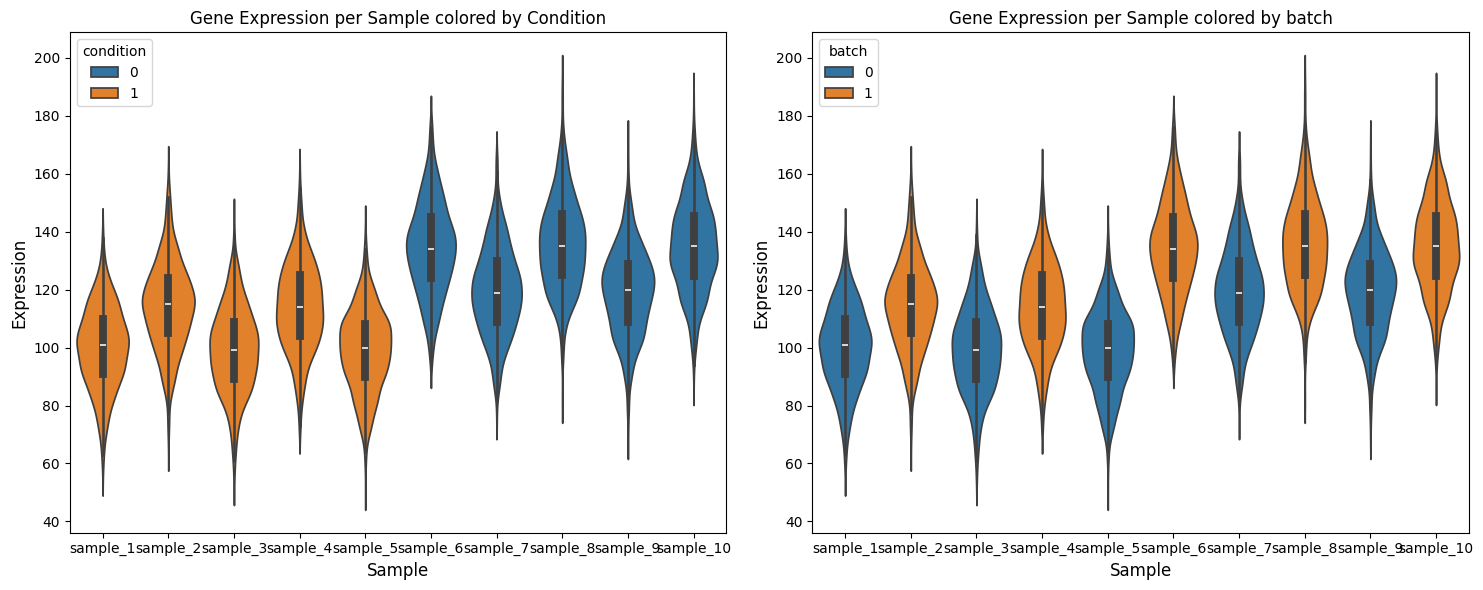

In [2]:
counts = pd.read_csv("/home/magnolia/R_PROJECTS/data_/synthetic_counts.csv")
meta_data = pd.read_csv("/home/magnolia/R_PROJECTS/data_/sample_metadata.csv")

sampleid = meta_data['sample_id'].to_list()
condition = meta_data['condition'].to_list()
batch = meta_data['batch'].to_list()
geneid = counts['gene_id'].to_list()

count_columns = counts.columns
countsMatrix = counts.drop(columns=['gene_id']).to_numpy()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
meta_data['condition'] = le.fit_transform(meta_data['condition'])
meta_data['batch'] = le.fit_transform(meta_data['batch'])

df_long = counts.T.reset_index()
df_long.columns = ['sample'] + geneid
df_long = pd.melt(df_long, id_vars='sample', var_name='gene_id', value_name='expression')
df_long = df_long.merge(meta_data[['sample_id', 'condition', 'batch']], left_on='sample', right_on='sample_id')

fig, axes = plt.subplots(1,2, figsize=(15,6))

sns.violinplot(data=df_long, x='sample', y='expression', hue='condition', ax=axes[0])
axes[0].set_title("Gene Expression per Sample colored by Condition")
axes[0].set_xlabel("Sample", size = 12)
axes[0].set_ylabel("Expression", size = 12)

sns.violinplot(data=df_long, x='sample', y='expression', hue='batch', ax=axes[1])
axes[1].set_title("Gene Expression per Sample colored by batch")
axes[1].set_xlabel("Sample", size = 12)
axes[1].set_ylabel("Expression", size = 12)

plt.tight_layout()

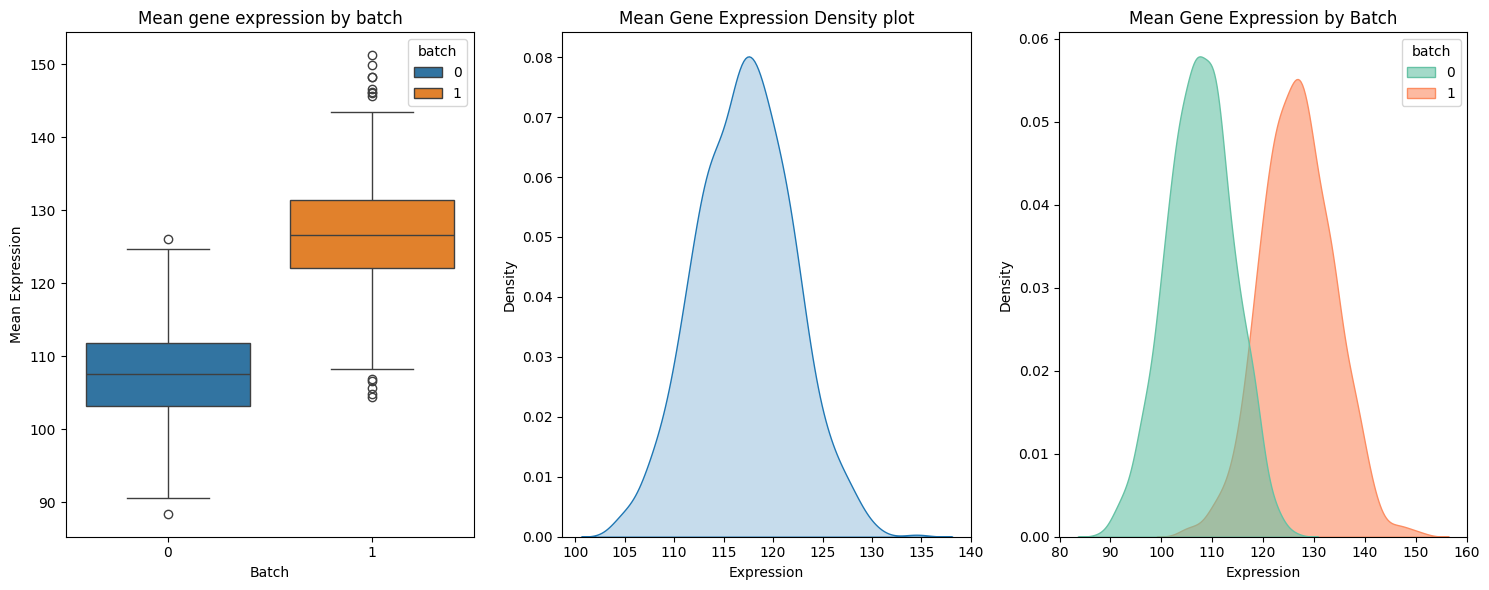

In [3]:
grouped = df_long.groupby(['gene_id', 'batch'])
grouped_mean_expression = pd.DataFrame(grouped['expression'].mean()).reset_index()

fig, axes = plt.subplots(1,3, figsize=(15,6))
sns.boxplot(data=grouped_mean_expression, x='batch', y='expression', hue='batch', ax=axes[0])
axes[0].set_title("Mean gene expression by batch")
axes[0].set_xlabel("Batch")
axes[0].set_ylabel("Mean Expression")

mean_expression_matrix = np.mean(countsMatrix, axis = 1)
sns.kdeplot(mean_expression_matrix, fill="blue", ax=axes[1])
axes[1].set_title("Mean Gene Expression Density plot")
axes[1].set_xlabel("Expression")

sns.kdeplot(data = grouped_mean_expression, x = 'expression', hue = 'batch', fill = 'true', common_norm = False, alpha = 0.6, palette = 'Set2', ax=axes[2])
axes[2].set_title("Mean Gene Expression by Batch")
axes[2].set_xlabel("Expression")


plt.tight_layout()

Text(0, 0.5, 'Mean gene Expression')

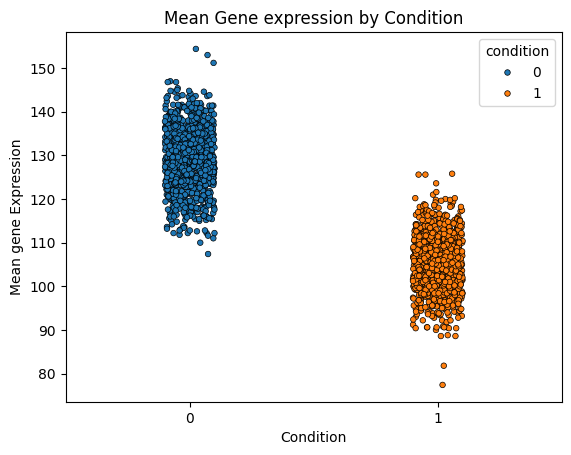

In [40]:
x = df_long.groupby(['gene_id', 'condition'])
grouped_condition_mean_expression=pd.DataFrame(x['expression'].mean()).reset_index()


sns.stripplot(data=grouped_condition_mean_expression, x = 'condition', y = 'expression',
              alpha = 1, edgecolor='black', hue='condition', linewidth=0.5, size=4)
plt.title("Mean Gene expression by Condition")
plt.xlabel("Condition")
plt.ylabel("Mean gene Expression")

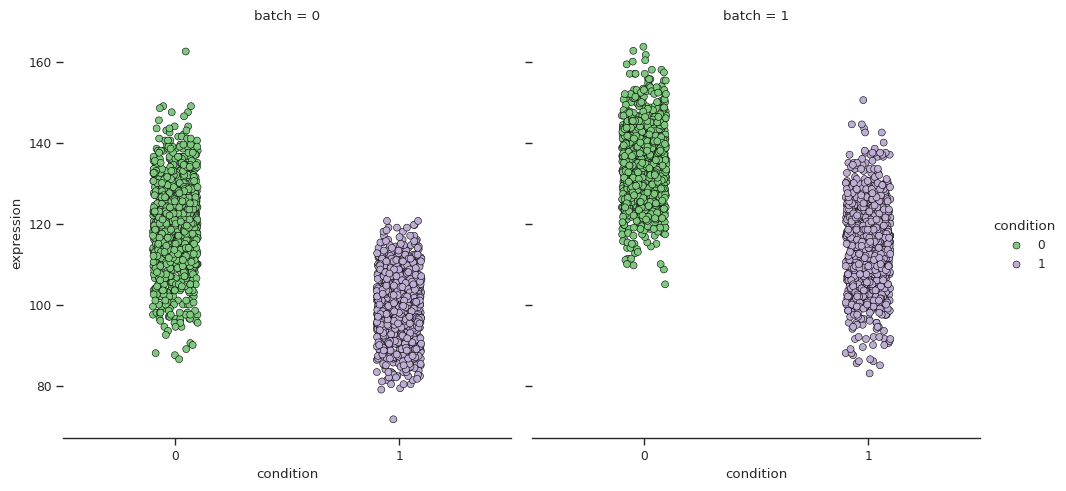

In [84]:
x = df_long.groupby(['gene_id', 'condition', 'batch'])
grouped_condition_batch_mean_expression = pd.DataFrame(x['expression'].mean()).reset_index()

sns.set_palette("Accent")
sns.set_style("ticks")
sns.catplot(data=grouped_condition_batch_mean_expression, x = 'condition', y='expression', col='batch', kind="strip",
            hue="condition", edgecolor='black', linewidth=0.4)
sns.despine(left=True)